# 02.03. Bardziej zaawansowany przykład Django

_hic sunt dracones_

![hic_sunt_dracones](images/hic_sunt_dracones.png)

Wkraczamy na niebezpieczne terytorium. Tutaj przetrwają tylko najsilniejsi (czyli my).

Jeśli ktoś ma więcej czasu polecam lekturę [tego wycinka](https://tutorial.djangogirls.org/pl/django_models/) tutorialu Django Girls. Dowiemy się z niego czym są modele w Django.

Oczywiście jeśli ktoś __nie ma czasu__ (choroba dzisiejszych czasów, _o termpora, o mores!_
), natenczas zapraszam do lektury abstraktu poniżej.

## Cel na ten Nobook

Znów używamy naszej największej przewagi ewolucyjnej (wyobraźni) i stawiamy się w następującej problematycznej sytuacji:

jesteśmy naukowcem, emporystą z krwi i kości. Czego potrzebujemy, aby nasze teorie miały oparcie w rzeczywistości? Eksperymentu oczywiście! Bo czy nie tym właśnie naukowcy się nie zajmują, nie przeprowadzają eksperymentów (chociażby myślowych), które mają na celu sprawdzenie jakiejś konkretnej teorii? Ale do tematu:

> In science, experiment without theory is blind, but theory without experiment is empty.

_Paul Thagard, 2007, Artificial Intelligence_

### Przykład klasyczny, acz zazwyczaj-nie-ma-czasu-aby-go-przytaczać

![galton](images/galton.jpg)

_Kto zna tego pana?_

Przytoczymy go więc przy okazji. [Całość tutaj](https://amstat.tandfonline.com/doi/full/10.1080/10691898.2001.11910537#), skrót w kolejnych zdaniach. Żyjemy w XIX-wiecznej Anglii, w największym imperium jakie widział świat u szczytu potęgi tegoż właśnie imperium. Naszym kuzynem jest sam Charles Robert Darwin. Tak się składa, że my również przysłużymy się nauce. W jaki sposób? Otóż położymy podwaliny konceptualne pod analizę regresji i korelację. _Shall we?_

Obserwujemy pewne zjawisko zachodzące w świecie, a mianowicie dziedziczenie cech. Jedna ze składowych życia. Pokolenia zstępujące przekazują pewne cechy pokoleniom wstępującym. W tym momencie rodzą się dwa pytania:
 1. Czy rzeczywiście tak jest? Być może tak się nam po prostu wydaje?
 2. Jeśli tak rzeczywiście jest, jaka jest siła tego oddziaływania (dziedziczności)?

Ciekawość nie daje nam spokoju, bierzemy się zatem do pracy. Potrzebujemy jakiegoś obiektu badawczego. Weźmy groszek, pachnący ( _lathyrus latifolius_ ). (Ciekawostka: jak pamiętamy, groszek [zwyczajny co prawda, ale zawsze groszek, ta sama rodzina, _fabaceae_ ] już raz był przyczynił się do rozwoju nauki, ale to nie był główny powód, dlaczego wybraliśmy akurat groszek.)

![sweet_pea](images/sweet_pea.jpg)

Co zrobimy, aby objąć nasz problem _konceptualnie_ ? Otóż rysujemy wykres, na którym na jednej osi mamy cechy "rodziców", a na drugiej "potomstwa" (jak w przykładzie poniżej, z artykułu podlinkowanego wcześniej):

![regression](images/regression.jpg)

### Trochę techniki

W tym momencie się zatrzymajmy. Weźmy przykład danych, na którym działaliśmy (**Uwaga** w tym miejscu w celach dydaktycznych odbiegamy od oryginalnych danych). Wczytajmy przykładowe dane:

In [1]:
import pandas as pd

df = pd.read_csv('data/Galton_pea.csv')
df

,Diameter of Parent Seed (0.01 inch),Diameter of Daughter Seed (0.01 inch)
0,23.0,27.1
1,33.7,44.1
2,27.8,44.1
3,31.5,47.9
4,29.9,45.5
...,...,...
195,44.4,45.1
196,30.5,22.9
197,33.0,28.3
198,32.9,21.5


In [2]:
df.describe()

,Diameter of Parent Seed (0.01 inch),Diameter of Daughter Seed (0.01 inch)
count,200.000000,200.000000
mean,32.105000,40.044000
std,8.247313,9.080265
min,10.300000,13.100000
25%,27.250000,34.400000
50%,32.250000,40.950000
75%,38.050000,45.425000
max,53.400000,62.700000


Jak narysować regresję w Pythonie? Na przykład tak ([źródło](https://raphaelvallat.com/correlation.html)):

In [3]:
# Importy muszą być osobno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

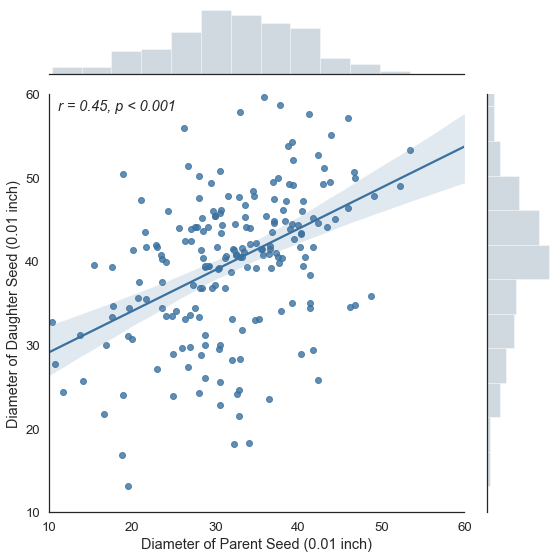

In [4]:
sns.set(style='white', font_scale=1.2)

r, p = pearsonr(df['Diameter of Parent Seed (0.01 inch)'], df['Diameter of Daughter Seed (0.01 inch)'])
# Prevent p=0.000
if p < 0.001:
    p = 0.001

g = sns.JointGrid(data=df,
                  x='Diameter of Parent Seed (0.01 inch)',
                  y='Diameter of Daughter Seed (0.01 inch)',
                  xlim=(10, 60),
                  ylim=(10, 60), height=8)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(11, 58, 'r = %.02f, p < %.03f' % (r, p), fontstyle='italic')
plt.tight_layout()

### Co to ma wszystko wspólnego z KCK?

Otóż wyobraźmy sobie, że jako naukowiec wiemy jak wyliczyć regresję, ale ani nie mamy narzędzia, aby to robić regularnie, ale nie sprawia nam to specjalnej przyjemności. Co byśmy wtedy chcieli? Chcielibyśmy narzędzia, które robi to za nas. Na zasadzie: "dostarczam dane", a następnie: "otrzymuję wyniki" -- statystyki, wizualizacje, itd. I dopiero na tej podstawie wyciągam wnioski ze swojego badania.

Czy można zrobić taką platformę do liczenia danych za pomocą Django? Oczywiście, to właśnie teraz zrobimy.

## Do dzieła!

### Wprowadzanie danych